In [1]:
%matplotlib inline

### 导入
习惯上，我们这样导入pandas:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 创建对象
通过列表可以创建Series，Pandas会自动创建整型索引。

In [3]:
s=pd.Series([1,3,5,np.nan,6,8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


通过NumPy的数组可以创建一个DataFrame。

In [4]:
dates=pd.date_range('20130101',periods=6)
print(dates)
df=pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
print(df)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2013-01-01  0.519627  1.751828 -1.349693  1.876903
2013-01-02 -0.883766  0.926912  0.297259 -0.797213
2013-01-03 -0.909585  0.503203 -0.184375 -0.946056
2013-01-04 -0.129277 -2.050695 -0.457264  0.834746
2013-01-05  0.265509  1.403383 -0.611878 -0.132460
2013-01-06  1.090137  0.344091  0.075852  0.786603


也可以通过字典来创建DataFrame

In [5]:
df2=pd.DataFrame({'A':1.,
                 'B':pd.Timestamp('20130102'),
                 'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                 'D':np.array([3]*4,dtype='int32'),
                 'E':pd.Categorical(['test','train','test','train']),
                 'F':'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


设置了特定的dtypes

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### 查看数据
查看数据的顶部和底部

In [7]:
print(df.head())
print(df.tail(3))

                   A         B         C         D
2013-01-01  0.519627  1.751828 -1.349693  1.876903
2013-01-02 -0.883766  0.926912  0.297259 -0.797213
2013-01-03 -0.909585  0.503203 -0.184375 -0.946056
2013-01-04 -0.129277 -2.050695 -0.457264  0.834746
2013-01-05  0.265509  1.403383 -0.611878 -0.132460
                   A         B         C         D
2013-01-04 -0.129277 -2.050695 -0.457264  0.834746
2013-01-05  0.265509  1.403383 -0.611878 -0.132460
2013-01-06  1.090137  0.344091  0.075852  0.786603


查看索引，列名，以及纯的NumPy数据

In [8]:
print(df.index)
print(df.columns)
print(df.values)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')
[[ 0.51962678  1.75182761 -1.34969307  1.87690338]
 [-0.88376601  0.92691199  0.29725942 -0.79721328]
 [-0.90958483  0.50320274 -0.18437465 -0.94605639]
 [-0.12927729 -2.05069512 -0.45726419  0.83474617]
 [ 0.26550921  1.40338325 -0.61187759 -0.13246034]
 [ 1.09013702  0.34409076  0.07585188  0.78660273]]


```DataFrame.describe()```提供了便捷的数据统计

In [9]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.007893,0.479787,-0.371683,0.270420
std,0.794183,1.348580,0.583845,1.090657
min,-0.909585,-2.050695,-1.349693,-0.946056
25%,-0.695144,0.383869,-0.573224,-0.631025
50%,0.068116,0.715057,-0.320819,0.327071
75%,0.456097,1.284265,0.010795,0.822710
max,1.090137,1.751828,0.297259,1.876903


转置矩阵

In [10]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.519627,-0.883766,-0.909585,-0.129277,0.265509,1.090137
B,1.751828,0.926912,0.503203,-2.050695,1.403383,0.344091
C,-1.349693,0.297259,-0.184375,-0.457264,-0.611878,0.075852
D,1.876903,-0.797213,-0.946056,0.834746,-0.132460,0.786603


沿某一轴排序

In [11]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2013-01-01,1.876903,-1.349693,1.751828,0.519627
2013-01-02,-0.797213,0.297259,0.926912,-0.883766
2013-01-03,-0.946056,-0.184375,0.503203,-0.909585
2013-01-04,0.834746,-0.457264,-2.050695,-0.129277
2013-01-05,-0.132460,-0.611878,1.403383,0.265509
2013-01-06,0.786603,0.075852,0.344091,1.090137


按照值进行排序

In [12]:
df.sort_values(by='B')

,A,B,C,D
2013-01-04,-0.129277,-2.050695,-0.457264,0.834746
2013-01-06,1.090137,0.344091,0.075852,0.786603
2013-01-03,-0.909585,0.503203,-0.184375,-0.946056
2013-01-02,-0.883766,0.926912,0.297259,-0.797213
2013-01-05,0.265509,1.403383,-0.611878,-0.132460
2013-01-01,0.519627,1.751828,-1.349693,1.876903


### 数据选择
**注意：**尽管Python标准库和NumPy的语句在选择和设置数据时更直观和方便交互。但是在生产环境中，我们更建议使用Pandas的数据访问函数：```.at, .iat, .loc, .iloc, .ix```

#### 数据获取
选择一列，返回Series。等同于df.A

In [13]:
df['A']

2013-01-01    0.519627
2013-01-02   -0.883766
2013-01-03   -0.909585
2013-01-04   -0.129277
2013-01-05    0.265509
2013-01-06    1.090137
Freq: D, Name: A, dtype: float64

使用```[]```来切分多行数据

In [14]:
print(df[0:3])
print(df['20130102':'20130104'])

                   A         B         C         D
2013-01-01  0.519627  1.751828 -1.349693  1.876903
2013-01-02 -0.883766  0.926912  0.297259 -0.797213
2013-01-03 -0.909585  0.503203 -0.184375 -0.946056
                   A         B         C         D
2013-01-02 -0.883766  0.926912  0.297259 -0.797213
2013-01-03 -0.909585  0.503203 -0.184375 -0.946056
2013-01-04 -0.129277 -2.050695 -0.457264  0.834746


#### 根据标签选择
使用标签来得到特定的一行

In [15]:
df.loc[dates[0]]

A    0.519627
B    1.751828
C   -1.349693
D    1.876903
Name: 2013-01-01 00:00:00, dtype: float64

使用标签来得到多个指定的列

In [16]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.519627,1.751828
2013-01-02,-0.883766,0.926912
2013-01-03,-0.909585,0.503203
2013-01-04,-0.129277,-2.050695
2013-01-05,0.265509,1.403383
2013-01-06,1.090137,0.344091


用标签来切片时，端点的值都是被包含在内的

In [17]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.883766,0.926912
2013-01-03,-0.909585,0.503203
2013-01-04,-0.129277,-2.050695


选择的返回值可以降低维度

In [18]:
df.loc['20130102',['A','B']]

A   -0.883766
B    0.926912
Name: 2013-01-02 00:00:00, dtype: float64

选择一个标量

In [19]:
df.loc[dates[0],'A']

0.51962677829927584

快速获取一个标量（与上面相同）

In [20]:
df.at[dates[0],'A']

0.51962677829927584

#### 根据位置进行选择
根据整数下标来选择数据

In [21]:
df.iloc[3]

A   -0.129277
B   -2.050695
C   -0.457264
D    0.834746
Name: 2013-01-04 00:00:00, dtype: float64

用整数来切片，类似于Python标准库和NumPy

In [22]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.129277,-2.050695
2013-01-05,0.265509,1.403383


用整数列表来进行选择，与Python标准库和NumPy类似

In [23]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.883766,0.297259
2013-01-03,-0.909585,-0.184375
2013-01-05,0.265509,-0.611878


对行进行切片选择

In [24]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.883766,0.926912,0.297259,-0.797213
2013-01-03,-0.909585,0.503203,-0.184375,-0.946056


对列进行切片选择

In [25]:
df.iloc[:,1:3]

,B,C
2013-01-01,1.751828,-1.349693
2013-01-02,0.926912,0.297259
2013-01-03,0.503203,-0.184375
2013-01-04,-2.050695,-0.457264
2013-01-05,1.403383,-0.611878
2013-01-06,0.344091,0.075852


获取某个标量

In [26]:
df.iloc[1,1]

0.92691199315835471

快速地获取某个标量（与上面的函数相同）

In [27]:
df.iat[1,1]

0.92691199315835471

#### 布尔索引
使用某列值来选择数据

In [28]:
df[df.A>0]

,A,B,C,D
2013-01-01,0.519627,1.751828,-1.349693,1.876903
2013-01-05,0.265509,1.403383,-0.611878,-0.132460
2013-01-06,1.090137,0.344091,0.075852,0.786603


从DataFrame中选择满足某条件的数据

In [29]:
df[df>0]

,A,B,C,D
2013-01-01,0.519627,1.751828,NaN,1.876903
2013-01-02,NaN,0.926912,0.297259,NaN
2013-01-03,NaN,0.503203,NaN,NaN
2013-01-04,NaN,NaN,NaN,0.834746
2013-01-05,0.265509,1.403383,NaN,NaN
2013-01-06,1.090137,0.344091,0.075852,0.786603


使用```isin()```函数来过滤数据

In [30]:
df2=df.copy()
df2['E']=['one','one','two','three','four','three']
print(df2)
df2[df2['E'].isin(['two','four'])]

                   A         B         C         D      E
2013-01-01  0.519627  1.751828 -1.349693  1.876903    one
2013-01-02 -0.883766  0.926912  0.297259 -0.797213    one
2013-01-03 -0.909585  0.503203 -0.184375 -0.946056    two
2013-01-04 -0.129277 -2.050695 -0.457264  0.834746  three
2013-01-05  0.265509  1.403383 -0.611878 -0.132460   four
2013-01-06  1.090137  0.344091  0.075852  0.786603  three


,A,B,C,D,E
2013-01-03,-0.909585,0.503203,-0.184375,-0.946056,two
2013-01-05,0.265509,1.403383,-0.611878,-0.132460,four


#### 设置数据
设置一个新列并设置索引

In [31]:
s1=pd.Series([1,2,3,4,5,6],index=pd.date_range('20130102',periods=6))
df['F']=s1
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

根据标签来设置值

In [32]:
df.at[dates[0],'A']=0
df

,A,B,C,D,F
2013-01-01,0.000000,1.751828,-1.349693,1.876903,NaN
2013-01-02,-0.883766,0.926912,0.297259,-0.797213,1.0
2013-01-03,-0.909585,0.503203,-0.184375,-0.946056,2.0
2013-01-04,-0.129277,-2.050695,-0.457264,0.834746,3.0
2013-01-05,0.265509,1.403383,-0.611878,-0.132460,4.0
2013-01-06,1.090137,0.344091,0.075852,0.786603,5.0


根据位置的来设置值

In [33]:
df.iat[0,1]=0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.349693,1.876903,NaN
2013-01-02,-0.883766,0.926912,0.297259,-0.797213,1.0
2013-01-03,-0.909585,0.503203,-0.184375,-0.946056,2.0
2013-01-04,-0.129277,-2.050695,-0.457264,0.834746,3.0
2013-01-05,0.265509,1.403383,-0.611878,-0.132460,4.0
2013-01-06,1.090137,0.344091,0.075852,0.786603,5.0


使用NumPy数组来赋值

In [34]:
df.loc[:,'D']=np.array([5]*len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.349693,5,NaN
2013-01-02,-0.883766,0.926912,0.297259,5,1.0
2013-01-03,-0.909585,0.503203,-0.184375,5,2.0
2013-01-04,-0.129277,-2.050695,-0.457264,5,3.0
2013-01-05,0.265509,1.403383,-0.611878,5,4.0
2013-01-06,1.090137,0.344091,0.075852,5,5.0


在过滤的同时进行赋值

In [35]:
df2=df.copy()
df2[df2>0]=-df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.349693,-5,NaN
2013-01-02,-0.883766,-0.926912,-0.297259,-5,-1.0
2013-01-03,-0.909585,-0.503203,-0.184375,-5,-2.0
2013-01-04,-0.129277,-2.050695,-0.457264,-5,-3.0
2013-01-05,-0.265509,-1.403383,-0.611878,-5,-4.0
2013-01-06,-1.090137,-0.344091,-0.075852,-5,-5.0


### 处理缺失数据
Pandas主要使用```np.nan```来表示缺失数据。这个值不会加入在计算中。
重新索引允许你对某一轴的索引进行更改/添加/删除操作。这会返回操作数据的拷贝对象。

In [36]:
df1=df.reindex(index=dates[0:4],columns=list(df.columns)+['E'])
df1.loc[dates[0]:dates[1],'E']=1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.349693,5,NaN,1.0
2013-01-02,-0.883766,0.926912,0.297259,5,1.0,1.0
2013-01-03,-0.909585,0.503203,-0.184375,5,2.0,NaN
2013-01-04,-0.129277,-2.050695,-0.457264,5,3.0,NaN


删除含有缺失数据的行

In [37]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.883766,0.926912,0.297259,5,1.0,1.0


填充缺失数据

In [38]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.349693,5,5.0,1.0
2013-01-02,-0.883766,0.926912,0.297259,5,1.0,1.0
2013-01-03,-0.909585,0.503203,-0.184375,5,2.0,5.0
2013-01-04,-0.129277,-2.050695,-0.457264,5,3.0,5.0


获取数据中是```nan```的位置

In [39]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### 基础操作
#### 基本的统计
操作默认排除了缺失的数据  
执行一个描述性的统计

In [40]:
df.mean()

A   -0.094497
B    0.187816
C   -0.371683
D    5.000000
F    3.000000
dtype: float64

在另外的轴执行该操作

In [41]:
df.mean(1)

2013-01-01    0.912577
2013-01-02    1.268081
2013-01-03    1.281849
2013-01-04    1.072553
2013-01-05    2.011403
2013-01-06    2.302016
Freq: D, dtype: float64

对不同维度数据的操作需要进行校准。Pandas会自动的在指定的维数上应用广播。

In [42]:
s=pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
print(s)
df.sub(s,axis='index')

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64


,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.909585,-0.496797,-1.184375,4.0,1.0
2013-01-04,-3.129277,-5.050695,-3.457264,2.0,0.0
2013-01-05,-4.734491,-3.596617,-5.611878,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


#### 应用函数
对数据应用函数

In [43]:
print(df.apply(np.cumsum))
df.apply(lambda x:x.max()-x.min())

                   A         B         C   D     F
2013-01-01  0.000000  0.000000 -1.349693   5   NaN
2013-01-02 -0.883766  0.926912 -1.052434  10   1.0
2013-01-03 -1.793351  1.430115 -1.236808  15   3.0
2013-01-04 -1.922628 -0.620580 -1.694072  20   6.0
2013-01-05 -1.657119  0.782803 -2.305950  25  10.0
2013-01-06 -0.566982  1.126894 -2.230098  30  15.0


A    1.999722
B    3.454078
C    1.646952
D    0.000000
F    4.000000
dtype: float64

#### 直方图

In [44]:
s=pd.Series(np.random.randint(0,7,size=10))
print(s)
print(s.value_counts())

0    2
1    2
2    4
3    2
4    4
5    2
6    1
7    4
8    1
9    3
dtype: int32
2    4
4    3
1    2
3    1
dtype: int64


#### 字符串函数
在下面的代码中，Series可以在```str```属性中应用许多字符处理函数，可以更方便的处理数据中的每个元素。需要注意的是模式识别默认使用正则表达式。

In [45]:
s=pd.Series(['A','B','C','Aaba','Baca',np.nan,'CABA','dog','cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### 数据合并
#### 数据拼接
Pandas提供了许多工具来根据索引逻辑和线性代数关系组合Series、DataFrame和Panel。
用```concat()```组合Pandas数据

In [46]:
df=pd.DataFrame(np.random.randn(10,4))
print(df)
pieces=[df[:3],df[3:7],df[7:]]
pd.concat(pieces)

          0         1         2         3
0 -1.185957  0.003406 -0.418602 -1.795964
1  1.476123  0.740420 -0.309832 -0.030821
2 -1.130280  1.407282  0.704248 -0.312520
3 -0.458707  0.406656  1.141934 -0.432106
4  2.310688  0.019981  2.008694  1.636378
5 -0.102571  1.274324 -0.336140  2.077588
6  0.394941 -0.198624  0.627003 -0.141601
7 -1.157877 -2.396454 -0.309037 -0.290056
8  0.778280 -1.036365 -1.471681 -0.482089
9  0.163682  1.242630  0.708397  0.579707


,0,1,2,3
0,-1.185957,0.003406,-0.418602,-1.795964
1,1.476123,0.740420,-0.309832,-0.030821
2,-1.130280,1.407282,0.704248,-0.312520
3,-0.458707,0.406656,1.141934,-0.432106
4,2.310688,0.019981,2.008694,1.636378
5,-0.102571,1.274324,-0.336140,2.077588
6,0.394941,-0.198624,0.627003,-0.141601
7,-1.157877,-2.396454,-0.309037,-0.290056
8,0.778280,-1.036365,-1.471681,-0.482089
9,0.163682,1.242630,0.708397,0.579707


#### 数据关联
SQL形式

In [47]:
left=pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
right=pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})
print(left)
print(right)
pd.merge(left,right,on='key')

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [48]:
left=pd.DataFrame({'key':['foo','bar'],'lval':[1,2]})
right=pd.DataFrame({'key':['foo','bar'],'rval':[4,5]})
print(left)
print(right)
pd.merge(left,right,on='key')

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


#### 添加数据（Append）
给DataFrame添加行

In [49]:
df=pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])
print(df)
s=df.iloc[3]
df.append(s,ignore_index=True)

          A         B         C         D
0  0.003068 -0.485285 -0.419189  0.153555
1 -1.068066  0.369219  0.433112  0.430304
2  0.536439  0.036806 -0.482881 -1.012446
3  0.712923 -0.249292 -0.193645  1.042048
4  0.930002  1.783770  1.908079  0.554436
5  2.453541  0.256729  1.437505 -1.486410
6  0.175619  1.598335  1.988100 -2.324513
7 -2.079349  1.181692 -0.219713  0.994813


,A,B,C,D
0,0.003068,-0.485285,-0.419189,0.153555
1,-1.068066,0.369219,0.433112,0.430304
2,0.536439,0.036806,-0.482881,-1.012446
3,0.712923,-0.249292,-0.193645,1.042048
4,0.930002,1.783770,1.908079,0.554436
5,2.453541,0.256729,1.437505,-1.486410
6,0.175619,1.598335,1.988100,-2.324513
7,-2.079349,1.181692,-0.219713,0.994813
8,0.712923,-0.249292,-0.193645,1.042048


### 分组
分组包含以下的一个或多个流程：
 - 分组 根据某种标准分组数据
 - 应用 对每个组应用一个函数
 - 组合 把分组的结果组合成一个整体结构

In [50]:
df=pd.DataFrame({'A':['foo','bar','foo','bar','foo','bar','foo','foo'],'B' : ['one', 'one', 'two', 'three',
                              'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                      'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.924481,0.293714
1,bar,one,-0.513266,-0.765326
2,foo,two,-1.486644,0.240244
3,bar,three,0.839374,0.605076
4,foo,two,0.411683,-0.486882
5,bar,two,0.116702,0.541861
6,foo,one,0.617817,-0.383960
7,foo,three,-0.361919,-1.732078


分组并对分组后的结果求和

In [51]:
df.groupby('A').sum()

,C,D
A,,
bar,0.442810,0.381611
foo,0.105418,-2.068961


根据多个列进行分组可以如下操作

In [52]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.513266 -0.765326
    three  0.839374  0.605076
    two    0.116702  0.541861
foo one    1.542298 -0.090246
    three -0.361919 -1.732078
    two   -1.074961 -0.246638

### 改变数据形状
#### 压缩

In [53]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                         'foo', 'foo', 'qux', 'qux'],
                        ['one', 'two', 'one', 'two',
                         'one', 'two', 'one', 'two']]))
print(tuples)
index=pd.MultiIndex.from_tuples(tuples,names=['first','second'])
df=pd.DataFrame(np.random.randn(8,2),index=index,columns=['A','B'])
df2 = df[:4]
df2

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]


A         B
first second                    
bar   one     0.127572 -0.005527
      two     0.128018 -2.473179
baz   one     0.715606 -0.119786
      two    -0.963227  0.960392

```stack()```函数压缩了这个DataFrame中的一列

In [54]:
stacked=df2.stack()
stacked

first  second   
bar    one     A    0.127572
               B   -0.005527
       two     A    0.128018
               B   -2.473179
baz    one     A    0.715606
               B   -0.119786
       two     A   -0.963227
               B    0.960392
dtype: float64

对于压缩之后的DataFrame，能够使用和```stack()```函数相反的```unstack()```函数，默认会解压缩最后一列

In [55]:
print(stacked.unstack())
print(stacked.unstack(1))
stacked.unstack(0)

                     A         B
first second                    
bar   one     0.127572 -0.005527
      two     0.128018 -2.473179
baz   one     0.715606 -0.119786
      two    -0.963227  0.960392
second        one       two
first                      
bar   A  0.127572  0.128018
      B -0.005527 -2.473179
baz   A  0.715606 -0.963227
      B -0.119786  0.960392


first          bar       baz
second                      
one    A  0.127572  0.715606
       B -0.005527 -0.119786
two    A  0.128018 -0.963227
       B -2.473179  0.960392

#### 数据透视表

In [56]:
df=pd.DataFrame({'A':['one','one','two','three']*3,
                'B':['A','B','C']*4,
                'C':['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                'D':np.random.randn(12),
                'E':np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.900257,-1.200727
1,one,B,foo,0.120763,-2.006040
2,two,C,foo,0.375533,-1.210593
3,three,A,bar,1.201907,-1.089750
4,one,B,bar,-1.274266,0.536006
5,one,C,bar,-1.081125,-0.472602
6,two,A,foo,-1.307635,2.100175
7,three,B,foo,1.795790,-0.582945
8,one,C,foo,0.526311,0.831482
9,one,A,bar,1.533511,0.107257


我们可以非常简单的用上面的数据生成一张数据透视表:

In [57]:
pd.pivot_table(df,values='D',index=['A','B'],columns=['C'])

C             bar       foo
A     B                    
one   A  1.533511 -0.900257
      B -1.274266  0.120763
      C -1.081125  0.526311
three A  1.201907       NaN
      B       NaN  1.795790
      C  0.345764       NaN
two   A       NaN -1.307635
      B -1.183519       NaN
      C       NaN  0.375533

### 时间序列
Pandas拥有易用、强大且高效的方法来在频率变换中执行重采样操作（例如：把秒级别的数据转换成5分钟级别的数据）。这通常在金融应用中使用，但不仅限于金融应用。

In [58]:
rng=pd.date_range('1/1/2012',periods=100,freq='S')
ts=pd.Series(np.random.randint(0,500,len(rng)),index=rng)
ts.resample('5Min').sum()


2012-01-01    25205
Freq: 5T, dtype: int32

表现时区

In [59]:
rng=pd.date_range('3/6/2012 00:00',periods=5,freq='D')
ts=pd.Series(np.random.randn(len(rng)),rng)
print(ts)
ts_utc=ts.tz_localize('UTC')
ts_utc

2012-03-06    0.009108
2012-03-07    0.600028
2012-03-08   -1.021904
2012-03-09   -1.091162
2012-03-10   -0.401636
Freq: D, dtype: float64


2012-03-06 00:00:00+00:00    0.009108
2012-03-07 00:00:00+00:00    0.600028
2012-03-08 00:00:00+00:00   -1.021904
2012-03-09 00:00:00+00:00   -1.091162
2012-03-10 00:00:00+00:00   -0.401636
Freq: D, dtype: float64

转换到其他时区

In [60]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.009108
2012-03-06 19:00:00-05:00    0.600028
2012-03-07 19:00:00-05:00   -1.021904
2012-03-08 19:00:00-05:00   -1.091162
2012-03-09 19:00:00-05:00   -0.401636
Freq: D, dtype: float64

转换时间间隔的表现形式

In [61]:
rng=pd.date_range('1/1/2012',periods=5,freq='M')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
print(ts)
ps=ts.to_period()
print(ps)
ps.to_timestamp()

2012-01-31   -0.949245
2012-02-29   -2.085967
2012-03-31   -0.737572
2012-04-30   -3.341330
2012-05-31   -0.255460
Freq: M, dtype: float64
2012-01   -0.949245
2012-02   -2.085967
2012-03   -0.737572
2012-04   -3.341330
2012-05   -0.255460
Freq: M, dtype: float64


2012-01-01   -0.949245
2012-02-01   -2.085967
2012-03-01   -0.737572
2012-04-01   -3.341330
2012-05-01   -0.255460
Freq: MS, dtype: float64

### 标签数据
Pandas可以在DataFrame中包含标签数据。

In [62]:
df=pd.DataFrame({'id':[1,2,3,4,5,6],'raw_grade':['a','b','b','a','a','e']})

将原始数据转换成标签数据

In [63]:
df['grade']=df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

将标签重命名成更有意义的名字（对```Series.cat.categories```的赋值是没有申请新内存的）

In [64]:
df['grade'].cat.categories=['very good','good','very bad']
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

重排序标签并且同时增加缺失的标签（在```Series.cat```包下的函数默认返回新的```Series```）

In [65]:
df['grade']=df['grade'].cat.set_categories(['very bad','bad','medium','good','very good'])
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

排序是根据标签排序的，而不是字典序

In [66]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


对标签数据分组时同样会显示空标签

In [67]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### 绘图

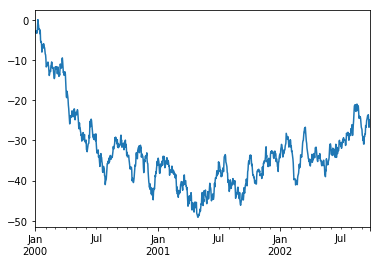

In [68]:
ts=pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
ts=ts.cumsum()
ts.plot()

在DataFrame上，```plot()```是一个函数可以方便地对数据的每个列进行绘图

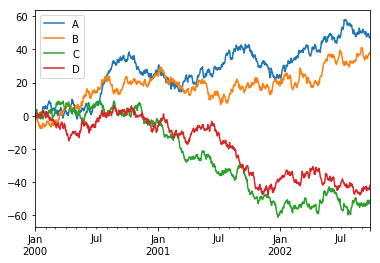

In [69]:
df=pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=['A','B','C','D'])
df=df.cumsum()
df.plot()


### 数据获取与导出
#### CSV
保存数据到csv文件中

In [70]:
df.to_csv('foo.csv')

从csv中读取数据

In [71]:
df=pd.read_csv('foo.csv')
df[:10]

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.528247,-0.209999,-0.043510,0.123380
1,2000-01-02,-1.514937,-1.064525,0.075450,0.094459
2,2000-01-03,-1.411570,0.231791,1.362177,-0.033032
3,2000-01-04,1.119268,0.505452,2.753380,0.013597
4,2000-01-05,2.013427,-1.376394,3.677715,-1.126888
5,2000-01-06,2.035195,-2.420584,3.490065,-0.365329
6,2000-01-07,1.274136,-2.091498,0.457607,1.494108
7,2000-01-08,0.428085,-3.537898,-0.797438,1.699856
8,2000-01-09,0.717784,-4.112115,-0.392448,0.568738
9,2000-01-10,0.789249,-3.830854,-1.106106,0.452820


#### HDF5
生成HDF5存储（需要安装tables库 ```pip3 install tables```）

In [72]:
df.to_hdf('foo.h5','df')

从HDF5存储中读取数据

In [73]:
df=pd.read_hdf('foo.h5','df')
df[:10]

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.528247,-0.209999,-0.043510,0.123380
1,2000-01-02,-1.514937,-1.064525,0.075450,0.094459
2,2000-01-03,-1.411570,0.231791,1.362177,-0.033032
3,2000-01-04,1.119268,0.505452,2.753380,0.013597
4,2000-01-05,2.013427,-1.376394,3.677715,-1.126888
5,2000-01-06,2.035195,-2.420584,3.490065,-0.365329
6,2000-01-07,1.274136,-2.091498,0.457607,1.494108
7,2000-01-08,0.428085,-3.537898,-0.797438,1.699856
8,2000-01-09,0.717784,-4.112115,-0.392448,0.568738
9,2000-01-10,0.789249,-3.830854,-1.106106,0.452820


#### Excel
生成Excel文件（需要安装openpyxl库```pip3 install openpyxl```）

In [74]:
df.to_excel('foo.xlsx',sheet_name='Sheet01')

从Excel中读取数据

In [75]:
pd.read_excel('foo.xlsx','Sheet01',index_col=None,na_values=['NA'])[:10]

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.528247,-0.209999,-0.043510,0.123380
1,2000-01-02,-1.514937,-1.064525,0.075450,0.094459
2,2000-01-03,-1.411570,0.231791,1.362177,-0.033032
3,2000-01-04,1.119268,0.505452,2.753380,0.013597
4,2000-01-05,2.013427,-1.376394,3.677715,-1.126888
5,2000-01-06,2.035195,-2.420584,3.490065,-0.365329
6,2000-01-07,1.274136,-2.091498,0.457607,1.494108
7,2000-01-08,0.428085,-3.537898,-0.797438,1.699856
8,2000-01-09,0.717784,-4.112115,-0.392448,0.568738
9,2000-01-10,0.789249,-3.830854,-1.106106,0.452820
